<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Распределение-переменных" data-toc-modified-id="Распределение-переменных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение переменных</a></span></li><li><span><a href="#Средние-значения-с-группировкой-по-оттоку" data-toc-modified-id="Средние-значения-с-группировкой-по-оттоку-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Средние значения с группировкой по оттоку</a></span></li><li><span><a href="#Корреляция-переменных" data-toc-modified-id="Корреляция-переменных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Корреляция переменных</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Рекомендации</a></span></li></ul></li></ul></div>

# Стратегия удержания клиентов сети фитнес-центров 

Используя информацию о поведенческих характеристиках и данных анкет клиентов сети фитнес-центров «Культурист-датасаентист», выявим основные признаки, наиболее тесно связанные с оттоком и проанализируем отличительные черты лояльных клиентов и клиентов, попавших в отток. Способность предсказывать отток по поведенческим и анкетным данным позволит бизнесу точнее прогнозировать финансовые результаты следующих месяцев и заранее принимать действия по наращиванию клиентской базы с учетом возможного ухода клиентов. Кроме того, кластеризация клиентов позволит идентифицировать целевые группы, инвестировать в повышение их лояльности, таргетироваться на похожих людей при привлечении новых клиентов. Типичный портрет потенциально ушедших клиентов, в свою очередь, поможет бизнесу меньше тратить на их привлечение и удержание.

Анализ основан на данных, предоставленных отделом по работе с клиентами, где:
* 'Churn' — факт оттока в текущем месяце;
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — принадлежность к компании-партнеру;
* 'Promo_friends' — факт привлечения в рамках акции «приведи друга»;
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах);
* 'Contract_period' — длительность текущего действующего абонемента (в месяцах);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра.

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
import math
import os
from IPython.display import display
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
f1_score, roc_auc_score, roc_curve, auc, silhouette_score
from sklearn.cluster import KMeans
from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.cluster import hierarchy

Выберем цвета проекта:

In [2]:
cmap = cm.get_cmap('BrBG_r', 8)
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    print(matplotlib.colors.rgb2hex(rgb))

#003c30
#177b73
#75c5ba
#d4edea
#f6ecd1
#dab972
#a26619
#543005


## Загрузка данных

Откроем файл с данными отдела по работе с клиентами и изучим общую информацию:

In [3]:
def file_read (server_path, filename):
    if os.path.exists(server_path):
        file_read = pd.read_csv(server_path, sep=',')
    else:
        file_read = pd.read_csv(filename, sep=',')
    return file_read

data = file_read('/datasets/gym_churn.csv','gym_churn.csv')
data.info()
display(data.head())
print('Дубликатов в таблице: {}'.format(data.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Дубликатов в таблице: 0


В исходном датасете содержится 4000 записей и 14 переменных: 4 непрерывных и 10 целочисленных, 7 из которых являются бинарными (принимают значения 1 или 0). Типы переменных распознаны корректно, за исключением 'month_to_end_contract', которую необходомо перекодировать в целочисленный формат. Также для удобства дальнейшей обработки переведем названия переменных в нижний регистр.

Пропусков и дубликатов в таблице не обнаружено, однако чтобы получить представление о качестве исходных данных, необходимо дополнительно изучить распределения переменных на предмет выбросов и иных аномалий.

In [4]:
data.columns = data.columns.str.lower()
data['month_to_end_contract'] = data['month_to_end_contract'].astype("int")

## Исследовательский анализ данных (EDA)

### Распределение переменных

Изучим характристики распределения переменных. Поскольку для бинарных переменных большинство параметров метода describe непоказательны, создадим отдельную таблицу с показателями средних, фактически отражающих долю 1 в общем количестве наблюдений.

In [5]:
display(data[{
    'contract_period', 'age', 'avg_additional_charges_total', 
    'month_to_end_contract', 'lifetime',
    'avg_class_frequency_total', 'avg_class_frequency_current_month'
}].describe().T.round(2))

display(data[{
    'gender', 'near_location', 'partner',
'promo_friends', 'phone', 'group_visits', 'churn'
     }].agg(['count_nonzero', 'mean']).T.round(2))

,count,mean,std,min,25%,50%,75%,max
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
avg_class_frequency_current_month,4000.0,1.77,1.05,0.00,0.96,1.72,2.51,6.15
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
lifetime,4000.0,3.72,3.75,0.00,1.00,3.00,5.00,31.00
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00
avg_class_frequency_total,4000.0,1.88,0.97,0.00,1.18,1.83,2.54,6.02
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.87,136.22,210.95,552.59


,count_nonzero,mean
churn,1061.0,0.27
group_visits,1649.0,0.41
partner,1947.0,0.49
near_location,3381.0,0.85
phone,3614.0,0.90
promo_friends,1234.0,0.31
gender,2041.0,0.51


**Поведенческие характеристики:**

* **Время с первого обращения в фитнес-центр (Lifetime).** В среднем клиенты пользуются услугами фитнес-центра 3.72 месяца, распределение смещено вправо (медина равна 3.00) из-за присутствия в данных выбивающихся значений - до 31 месяца.
* **Срок до окончания абонемента** половины клиентов составляет от 1 до 6 месяцев, 4.32 в среднем, максимальное значение - 1 год.
* **Длительность текущего абонемента.** Распределение переменной близко к сроку до окончания абонемента - с межквартильным размахом от 1 до 6 месяцев, 4.68 в среднем и максимальным значением 12 месяцев.
* **Частота посещений в неделю за все время с начала действия абонемента** половины клиентов принимает значения от 1.18 до 2.54 посещений в неделю, 1.88 в среднем. Максимальная средняя частота - 6.02 раз в неделю. Распределение смещено вправо.
* **Частота посещений в неделю за предыдущий месяц** в среднем составлляет 1.05, от 0.96 до 2.51 для большинства клиентов, максимальное значение 6.15.
* **Суммарная выручка от других услуг фитнес-центра.** В среднем клиенты фитнес-центра тратят на дополнительные услуги 146.94 у.е., отдельные выбивающиеся значения могут доходить до 552.59, в результате чего распределение смещено вправо.
* **Отток.** из 4000 клиентов 1061, или 27% считаются ушедшими.
* **Посещение групповых занятий.** 41% клиентов хотя бы раз посещали групповые занятия.

**Анкетные данные:**

* **Пол.** В исходных данных не указано, как закодированы мужчины и женщины, поэтому далее будем использовать обозначение пол "0" и пол "1". Среди клиентов группы представлены практически равномерно - 49% и 51% соответственно.
* **Возраст** половины клиентов составляет от 27 до 31 года, 29.18 в среднем. Возраст самого старшего клиента составляет 41 год.
* **Наличие контактного телефона.** 3614 клиентов, или 90%, предоставили свой номер телефона.
* **Близость к фитнес-центру.** 85% клиентов живут или работают поблизости от фитнес-клуба.
* **Принадлежность к компании-партнеру.** 49% клиентов являются сотрудниками компаний-партнёров клуба.
* **Привлечение в рамках акции «приведи друга».** 31% клиентов были первично привлечены по реферальной программе - промокоду от друзей.

### Средние значения с группировкой по оттоку

Изучим средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто продолжил ходить в фитнес-клуб:

In [6]:
display(data.groupby('churn').mean().T.round(2))

churn,0,1
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08
month_to_end_contract,5.28,1.66


Практически все метрики принимают большие значения среди лояльных клиентов: близость к фитнес-клубу, участие в партнерской программе, привлечение по промокоду от друзей, длительность текущего абонемента, посещение групповых занятий, возраст, выручка от дополнительных услуг, срок до конца абонемента, срок жизни клиента, средняя частота посещений за все время и за текущий месяц. В свою очередь, метрки возраста и наличия номера телефона принимают примерно равные значения по группам.

Однако полученные средние значения могут быть следствием отдельных выбросов, поэтому изучим распределения переменных с группировкой.

Для удобства разделим набор данных на лояльных и ушедших клиентов:

In [7]:
churn = data.query('churn == 1')
loyal = data.query('churn == 0')

Построим столбчатые гистограммы и распределения признаков для ушедших и лольных клиентов:

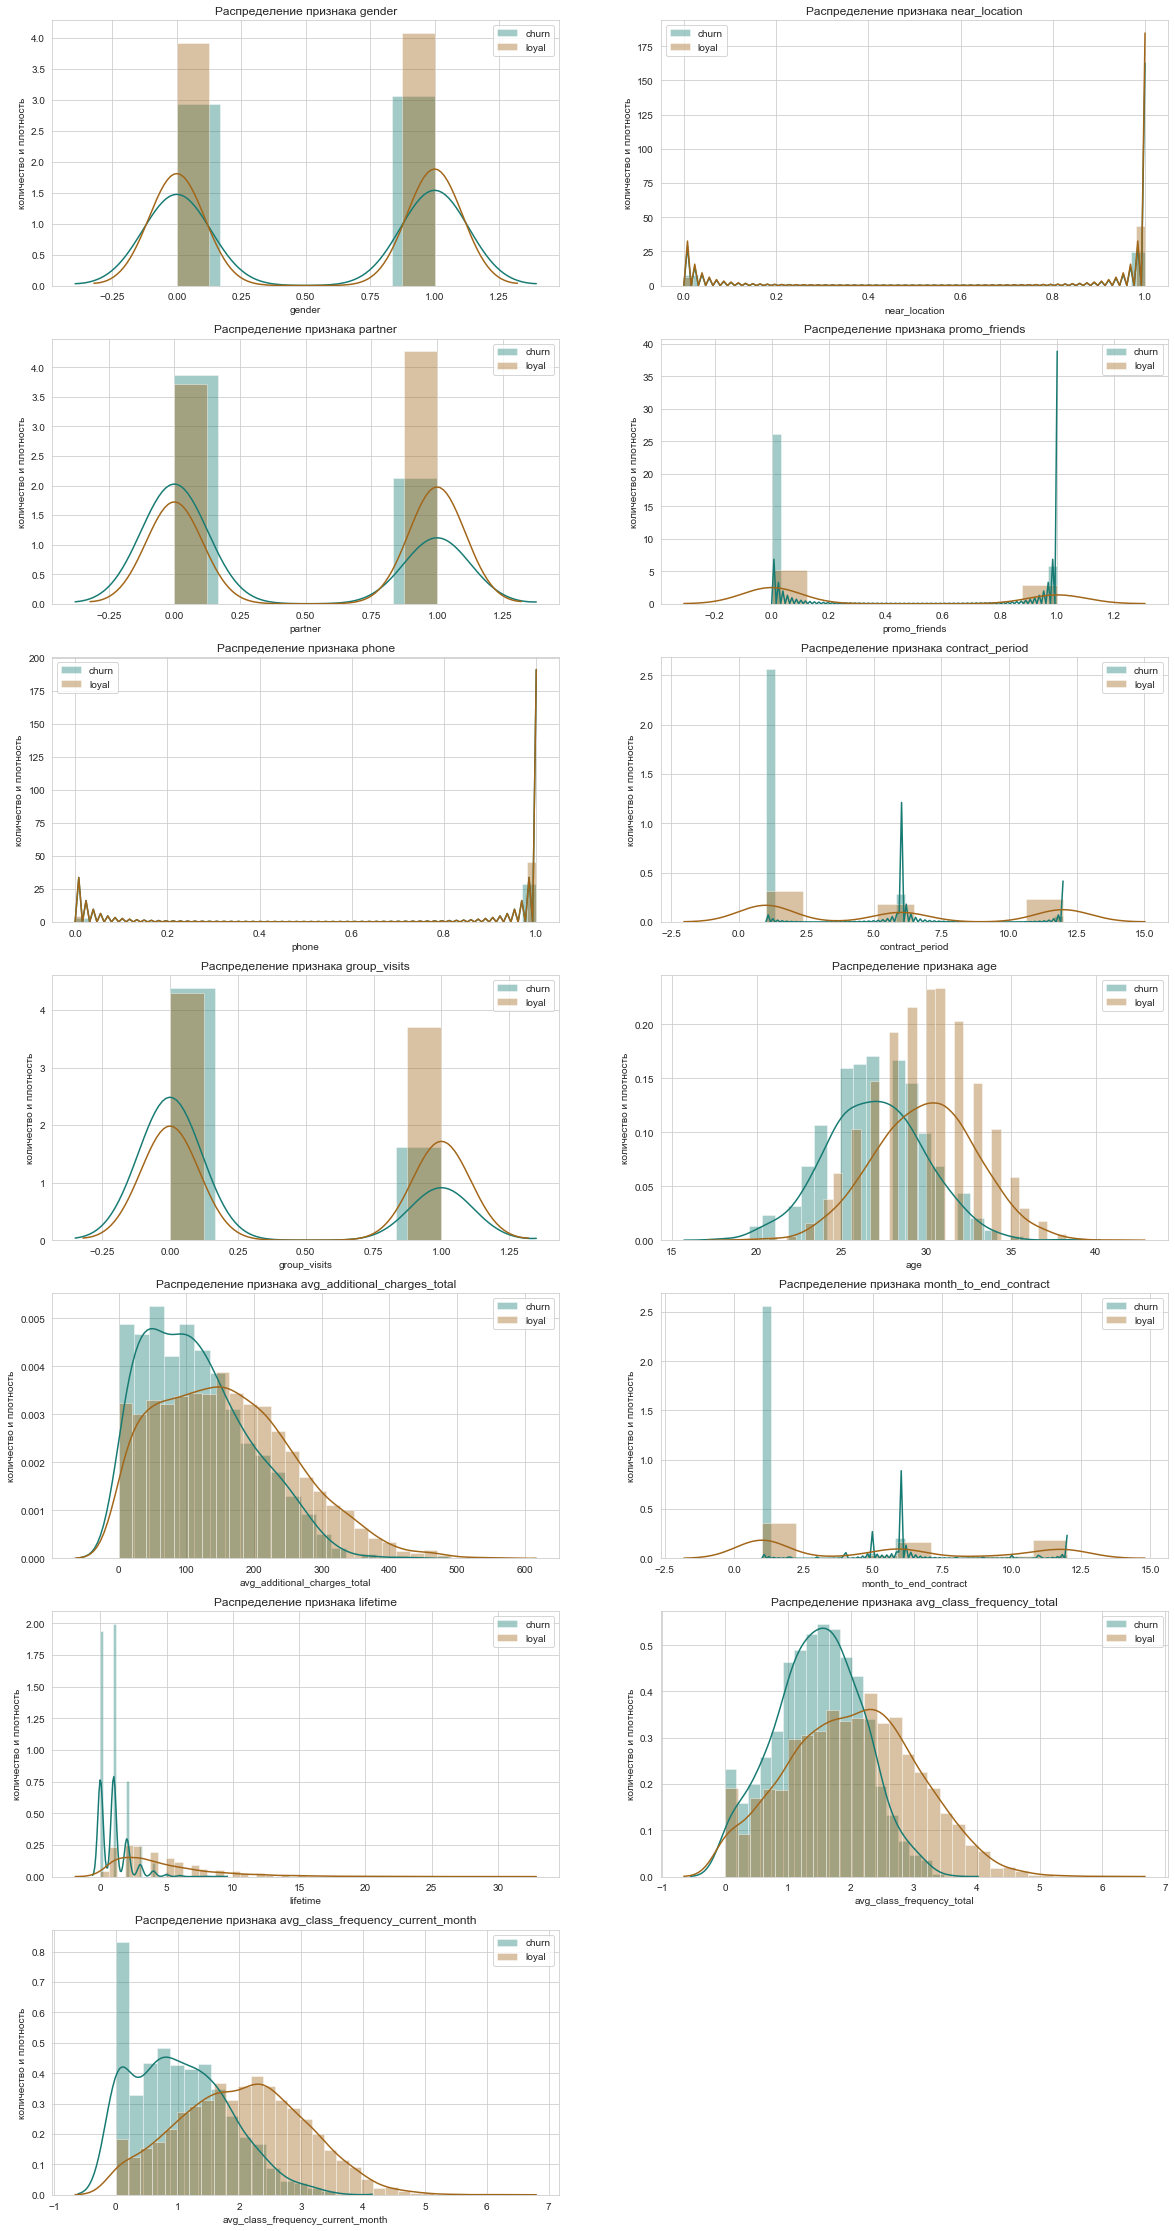

In [8]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(20,40))
c = 1
for column in data.drop('churn', axis = 1).columns:
    plt.subplot(7, 2, c)
    plt.title("Распределение признака "+column)
    plt.xlabel(column)
    plt.ylabel("количество и плотность")
    sns.distplot(churn[column], label='churn', color = '#177b73')
    sns.distplot(loyal[column], label='loyal', color = '#a26619')
    plt.legend()
    c = c + 1

plt.show()

Построим дополнительные графики для переменных, визуализации которых сложно интерпретировать:

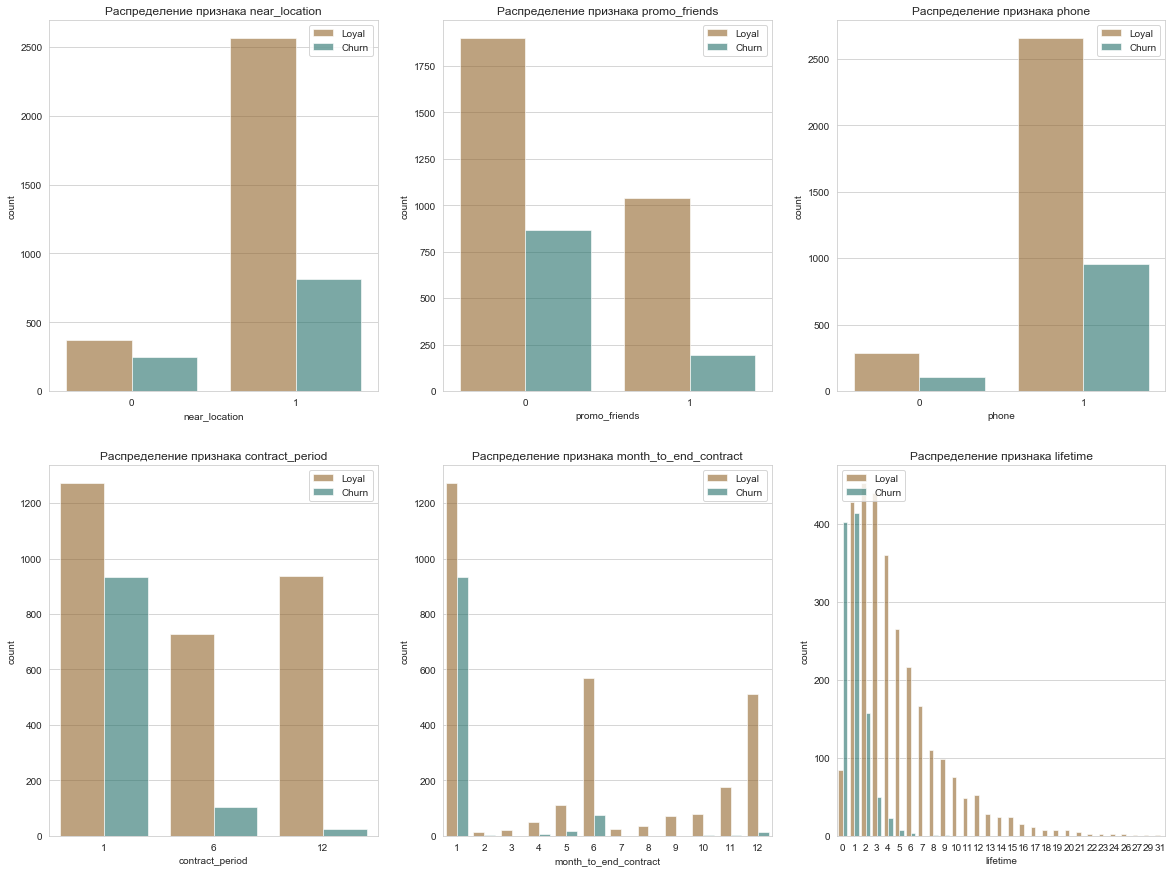

In [9]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(20,15))
c = 1
for feature in ['near_location', 'promo_friends', 'phone', 
                'contract_period', 'month_to_end_contract', 'lifetime']:
    plt.subplot(2, 3, c)
    plt.title("Распределение признака "+feature)
    plt.xlabel(feature)
    plt.ylabel("количество и плотность")
    sns.countplot(data=data, x=feature, hue='churn', 
                  alpha=.6, palette = ['#a26619','#177b73'])
    plt.legend(labels=["Loyal","Churn"])
    c = c + 1
    
plt.show()

По результатам визуального анализа можно сделать вывод, что группы имеют схожие распределения по переменным пола и наличия телефона. Для переменных возраста, выручки от дополнительных услуг, срока жизни клиента, средней частоты посещений за все время и за текущий месяц распределение лояльных клиентов заметно смещено вправо относительно распределения среди ушедших клиентов. Также есть отличия в сроках до конца абонемента: несмотря на то, что у обеих групп преобладают значения 1 месяц, среди лояльных клиентов также распространены значения 6 и 12 месяцев. 

Другими словами, лояльность клиентов имеет поведенческие провяления - как в частоте посещений, так и в длительности пользования услугами фитнес-клуба.

Также следует отметить, что среди лояльных клиентов заметно больше участников партнерских программ и клиентов, привлеченных по промокоду; больше доля длительных абонементов (на полгода и год); существенно больше клиентов, живущих и работающих рядом с фитнес-клубом; больше тех, кто хотя бы раз посещал групповые занятия.

### Корреляция переменных

Построим матрицу корреляций и визуализируем результат при помощи тепловой карты:

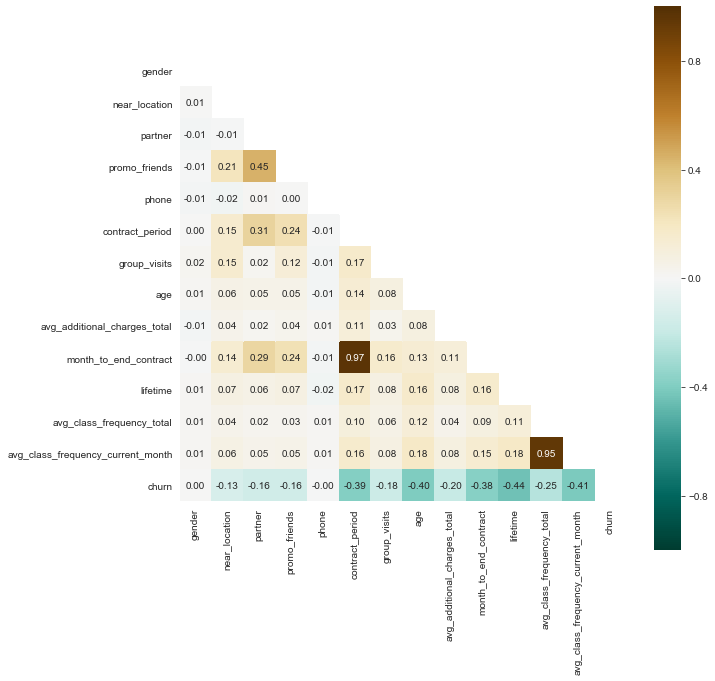

In [10]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap= 'BrBG_r', 
                     mask=mask, square=True)
plt.show()

Целевая переменная (переменная оттока) негативно коррелирована со всеми переменными, относящимися к поведению пользователей, а также с возрастом, близостью работы или проживания, участием в парнерской и промо-программах. Наиболее сильно выражена связь с длительностью взаимодействия, средней частотой посещений за последний месяц, возрастом, сроком текущего абонемента и сроком до окончания абонемента.

Есть пары переменных, сильно коррелированные между собой: 'month_to_end_contract' и 'contract_period'; 'avg_class_frequency_total', 'avg_class_frequency_current_month'. Чтобы избежать проблемы мультиколлинеарности, удалим те из них, которые меньше коррелированы с целевой переменной: 'month_to_end_contract' и 'avg_class_frequency_total'.

In [11]:
forecast_data = data.drop(['month_to_end_contract', 'avg_class_frequency_total'], axis=1)

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента. Для этого 
разделим данные на признаки (матрица X) и целевую переменную (y), разобъем данные на обучающую и валидационную выборки, а также обучим StandartScaler на обучающей выборке и преобразуем обучающий и валидационный наборы данных.

In [12]:
X = forecast_data.drop('churn', axis=1)
y = forecast_data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом. Для этого зададим алгоритм для модели, обучим модель и воспользуемся обученной моделью, чтобы сделать прогнозы.

**Логистическая регрессия**

In [13]:
lr_model = LogisticRegression(solver='lbfgs', random_state=0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

**Случайный лес**

In [14]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке и сравним по ним модели. 

In [15]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:')

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.84
	F1: 0.84
	ROC_AUC: 0.97
Метрики для модели случайного леса:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.77
	F1: 0.81
	ROC_AUC: 0.96


По показателю accuracy, или доли верно угаданных ответов из всех прогнозов, модель логистической регрессии оказалась лучше. Однако поскольку баланс классов, то есть соотношение 0 и 1 в показателе оттока, нарушен, метрика accuracy может работать некорректно. 

Чтобы оценить модель без привязки к соотношению классов, также сравним метрики Precision и Recall. По метрке precision можно утверждать, что обе модели дают одинаковую долю верных положительных прогнозов - 85% прогнозов со значением 1 верны.

По метрике recall модель логистической регрессии показала лучший результат - эта модель способна предсказывать 84% всех реальных значений 1, в то время как модель случайного леса обнаружила только 77% клиентов, попавших в отток.

Закономерно, что модель логистической регрессии оказалась луше и по метрике F1, учитывающей баланс между метриками Precision и Recall (0.84 против 0.81)

Наконец, по метрике AUC-ROC можно говорить о том, что обе модели хорошо предсказывают отток клиентов, однако качество классификатора по модели лог-регрессии несколько выше.

Таким образом, по совокупности метрик можно сделать вывод, что модель логистической регрессии дает лучшие предсказания классификации оттока клиентов по сравнению с моделью случайного леса.

Визуализируем ROC–AUC:

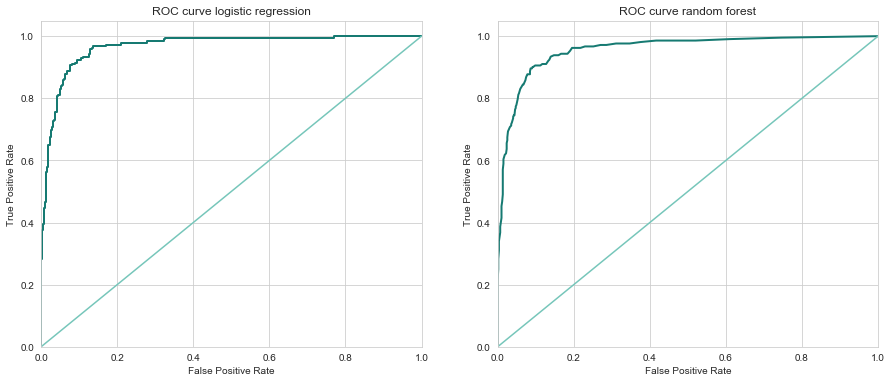

In [16]:
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("BrBG_r"))
fig = plt.figure(figsize=(15,6))
c = 1

for i, title in zip([lr_probabilities, rf_probabilities], ['logistic regression', 'random forest']):
    sns.set_palette(sns.color_palette("BrBG_r"))
    plt.subplot(1, 2, c)
    fpr, tpr, thresholds = roc_curve(y_test, i, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve '+title)
    c = c + 1
    
plt.show()

Площадь под кривой ошибок для обеих моделей стремится к 1, значит, предсказания класификаторов безошибочны в подавляющем большинстве случаев, при этом на графике заметно, что модель логистической регрессии дает лучшие предсказания, хотя отличие моделей незначительно.

## Кластеризация клиентов

Стандартизируем данные для проведения кластеризации клиентов фитнес-клуба:

In [17]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

Создадим матрицу расстояний на стандартизованной матрице признаков и построим дендрограмму. Для оценки расстояний между кластерами будем использовать метод Варда, минимизирующий сумму квадратов (SS) на каждом шаге агломерации с применением дисперсионного анализа.

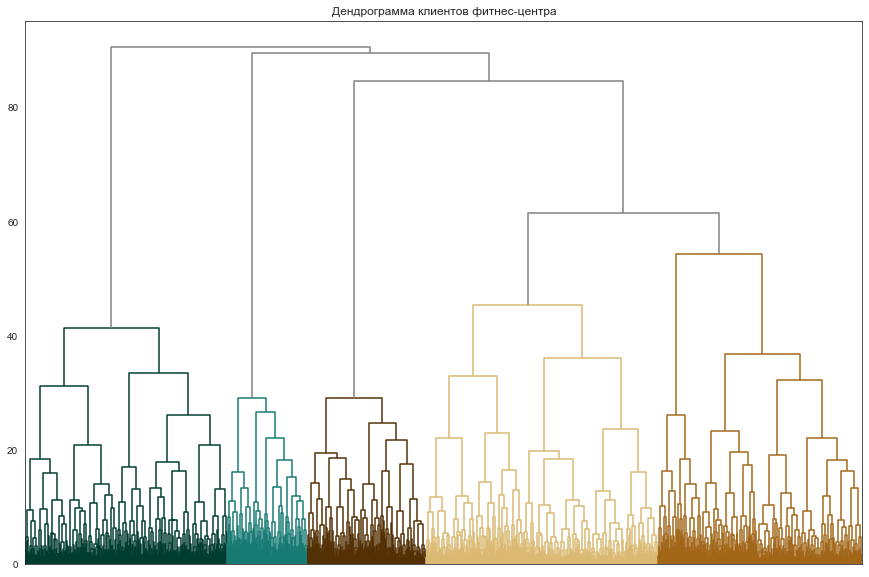

In [18]:
linked = hierarchy.linkage(x_sc, method = 'ward') 

sns.set_style('white')
hierarchy.set_link_color_palette(['#003c30', '#177b73', '#543005', '#dab972', '#a26619'])

plt.figure(figsize=(15, 10))
plt.title('Дендрограмма клиентов фитнес-центра')
hierarchy.dendrogram(linked, color_threshold=60, above_threshold_color='grey', orientation='top')
plt.xticks([])
plt.show()

На основе полученного графика иерархической кластеризации можно выделить 5 кластеров, поскольку после этого шага агломерации происходит заметный рост расстояний между кластерами. Кроме того, при 4 или 6 кластерах относительные размеры групп будут сильно отличаться.

Также для определения оптимальнго числа кластеров применим метод согнутого колена, подразумевающий многократное циклическое исполнение алгоритма кластеризации методом k-средних с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике значение метрики SSE (суммы квадратов ошибок).

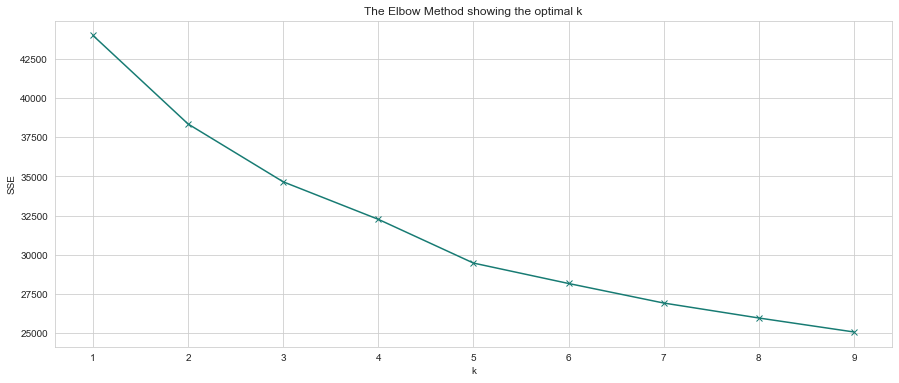

In [19]:
K = range(1,10)
sse = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0)
    kmeanModel.fit(x_sc)
    sse.append(kmeanModel.inertia_)

sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-', color = '#177b73')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Как такового перелома в графике с ростом числа кластров не происходит, однако снижение метрики SSE замедляется с переходом от 5 к 6 кластерам. Поэтому будем считать 5 оптимальным числом кластеров.

For n_clusters=2, Silhouette Coefficient = 0.13787234907320836
For n_clusters=3, Silhouette Coefficient = 0.15328107649119
For n_clusters=4, Silhouette Coefficient = 0.1662415170378247
For n_clusters=5, Silhouette Coefficient = 0.12461072219185391
For n_clusters=6, Silhouette Coefficient = 0.12475756784001035
For n_clusters=7, Silhouette Coefficient = 0.13516863037826168
For n_clusters=8, Silhouette Coefficient = 0.12991660272046662
For n_clusters=9, Silhouette Coefficient = 0.12430704454630843


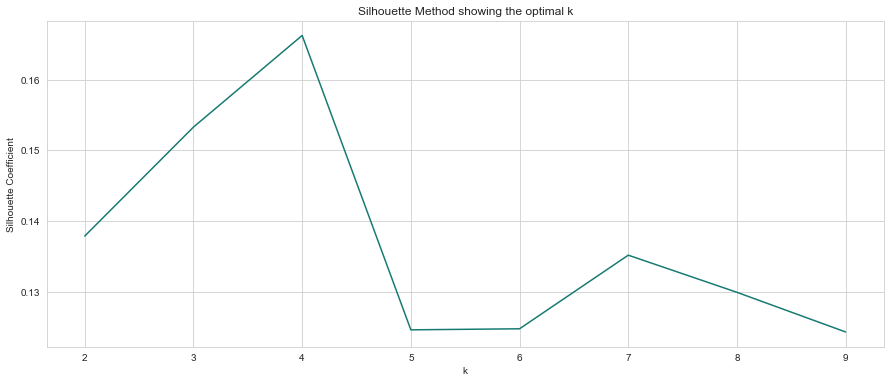

Оптимальное число кластеров: 4


In [20]:
k_clusters = []
sil_coeffecients = []

for n_cluster in range(2,10):
    kmeans = KMeans(n_clusters = n_cluster).fit(x_sc)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_sc, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(n_cluster, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(n_cluster)
    
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.plot(k_clusters, sil_coeffecients)
plt.title('Silhouette Method showing the optimal k')
plt.ylabel('Silhouette Coefficient'), plt.xlabel('k')
plt.show()

sil_best = max(sil_coeffecients)
k_best_index = sil_coeffecients.index(sil_best)
k_best = k_clusters[k_best_index]
print("Оптимальное число кластеров:", k_best)

Оптимальное количество кластеров по методу Силуэта равняется 4.

Обучим модель кластеризации на основании алгоритма K-Means с числом кластеров 5 и спрогнозируем кластеры для наблюдений:

In [21]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)
forecast_data['cluster_km'] = labels

Переименуем кластеры:

In [22]:
forecast_data['cluster_km'] = forecast_data['cluster_km'].replace({0: 'Cluster 1',
                                                                   1: 'Cluster 2',
                                                                   2: 'Cluster 3',
                                                                   3: 'Cluster 4',
                                                                   4: 'Cluster 5'})

Оценим качество кластеризации при помощи метрики силуэта:

In [23]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


Полученное значение метрики силуэта говорит о низкой способности кластеризации обеспичивать внутреннюю однородность групп и существенные межгрупповые различия, что может сильно ограничивать возможности интерпретации межкластерных отличий.

Чтобы проверить это, создадим визуализацию с группировкой по кластерам для пар признаков частоты посещений, дополнительных покупок и срока жизни клиентов.

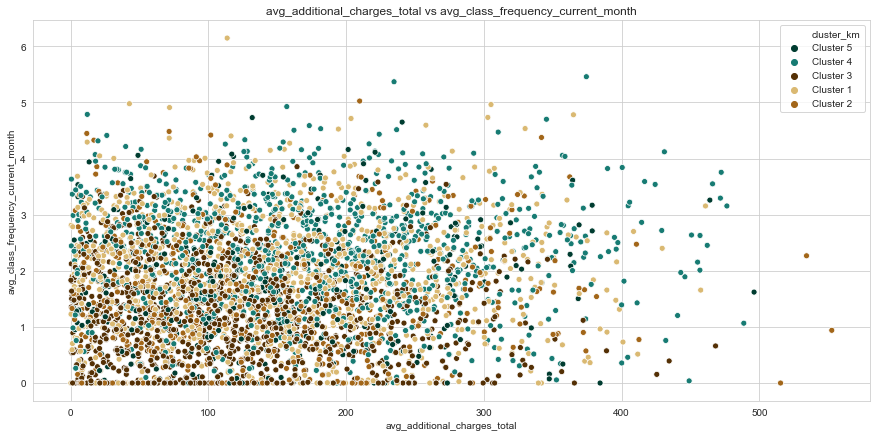

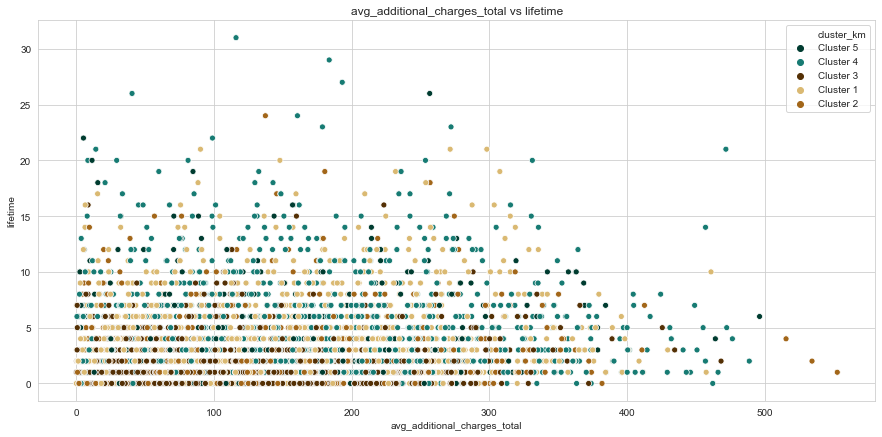

In [24]:
sns.set_style('whitegrid')
palette = ['#003c30', '#177b73', '#543005', '#dab972', '#a26619']

def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (15,7))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = palette
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(forecast_data, x_name='avg_additional_charges_total' ,
                      y_name='avg_class_frequency_current_month',
                      cluster_name='cluster_km')

show_clusters_on_plot(forecast_data, x_name='avg_additional_charges_total' ,
                      y_name='lifetime',
                      cluster_name='cluster_km')

Как видно из графиков, наблюдения плохо сгруппировались по ключевым для бизнеса метрикам и внутригрупповые различия зачастую сильнее межгрупповых.

Изучим наполненность кластеров наблюдениями и средние значения признаков для кластеров:

In [25]:
display(forecast_data['cluster_km'].value_counts(normalize=True).sort_index(ascending=True).to_frame())
clusters = pd.DataFrame(forecast_data.groupby(['cluster_km']).mean().round(2).T)
display(clusters)

,cluster_km
Cluster 1,0.24625
Cluster 2,0.13950
Cluster 3,0.26600
Cluster 4,0.25175
Cluster 5,0.09650


cluster_km,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
gender,0.50,0.50,0.50,0.53,0.52
near_location,1.00,0.00,1.00,1.00,0.86
partner,0.89,0.49,0.22,0.38,0.47
promo_friends,1.00,0.08,0.07,0.01,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,6.92,2.99,2.01,6.21,4.78
group_visits,0.52,0.23,0.28,0.54,0.43
age,29.61,28.68,27.58,30.70,29.30
avg_additional_charges_total,153.42,137.13,119.34,176.26,144.21
lifetime,4.28,2.97,1.92,5.42,3.94


В результате группировки 1, 3 и 4 кластеры сбалансированы по размеру, однако 2 и 5 кластеры оказались существенно меньше.

Можно выделить несколько пременных, по которым центры кластеров заметно дифференцированы: участие в партнерской и реферальной программах, срок текущего абонемента, групповые занятия, покупка дополнительных услуг, срок жизни клиента, частота посещений в текущий месяц и отток.

Чтобы подробнее изучить типичные характеристики кластеров, визуализируем распределения признаков, для дискретных и непрерывных переменных построим разные графики.

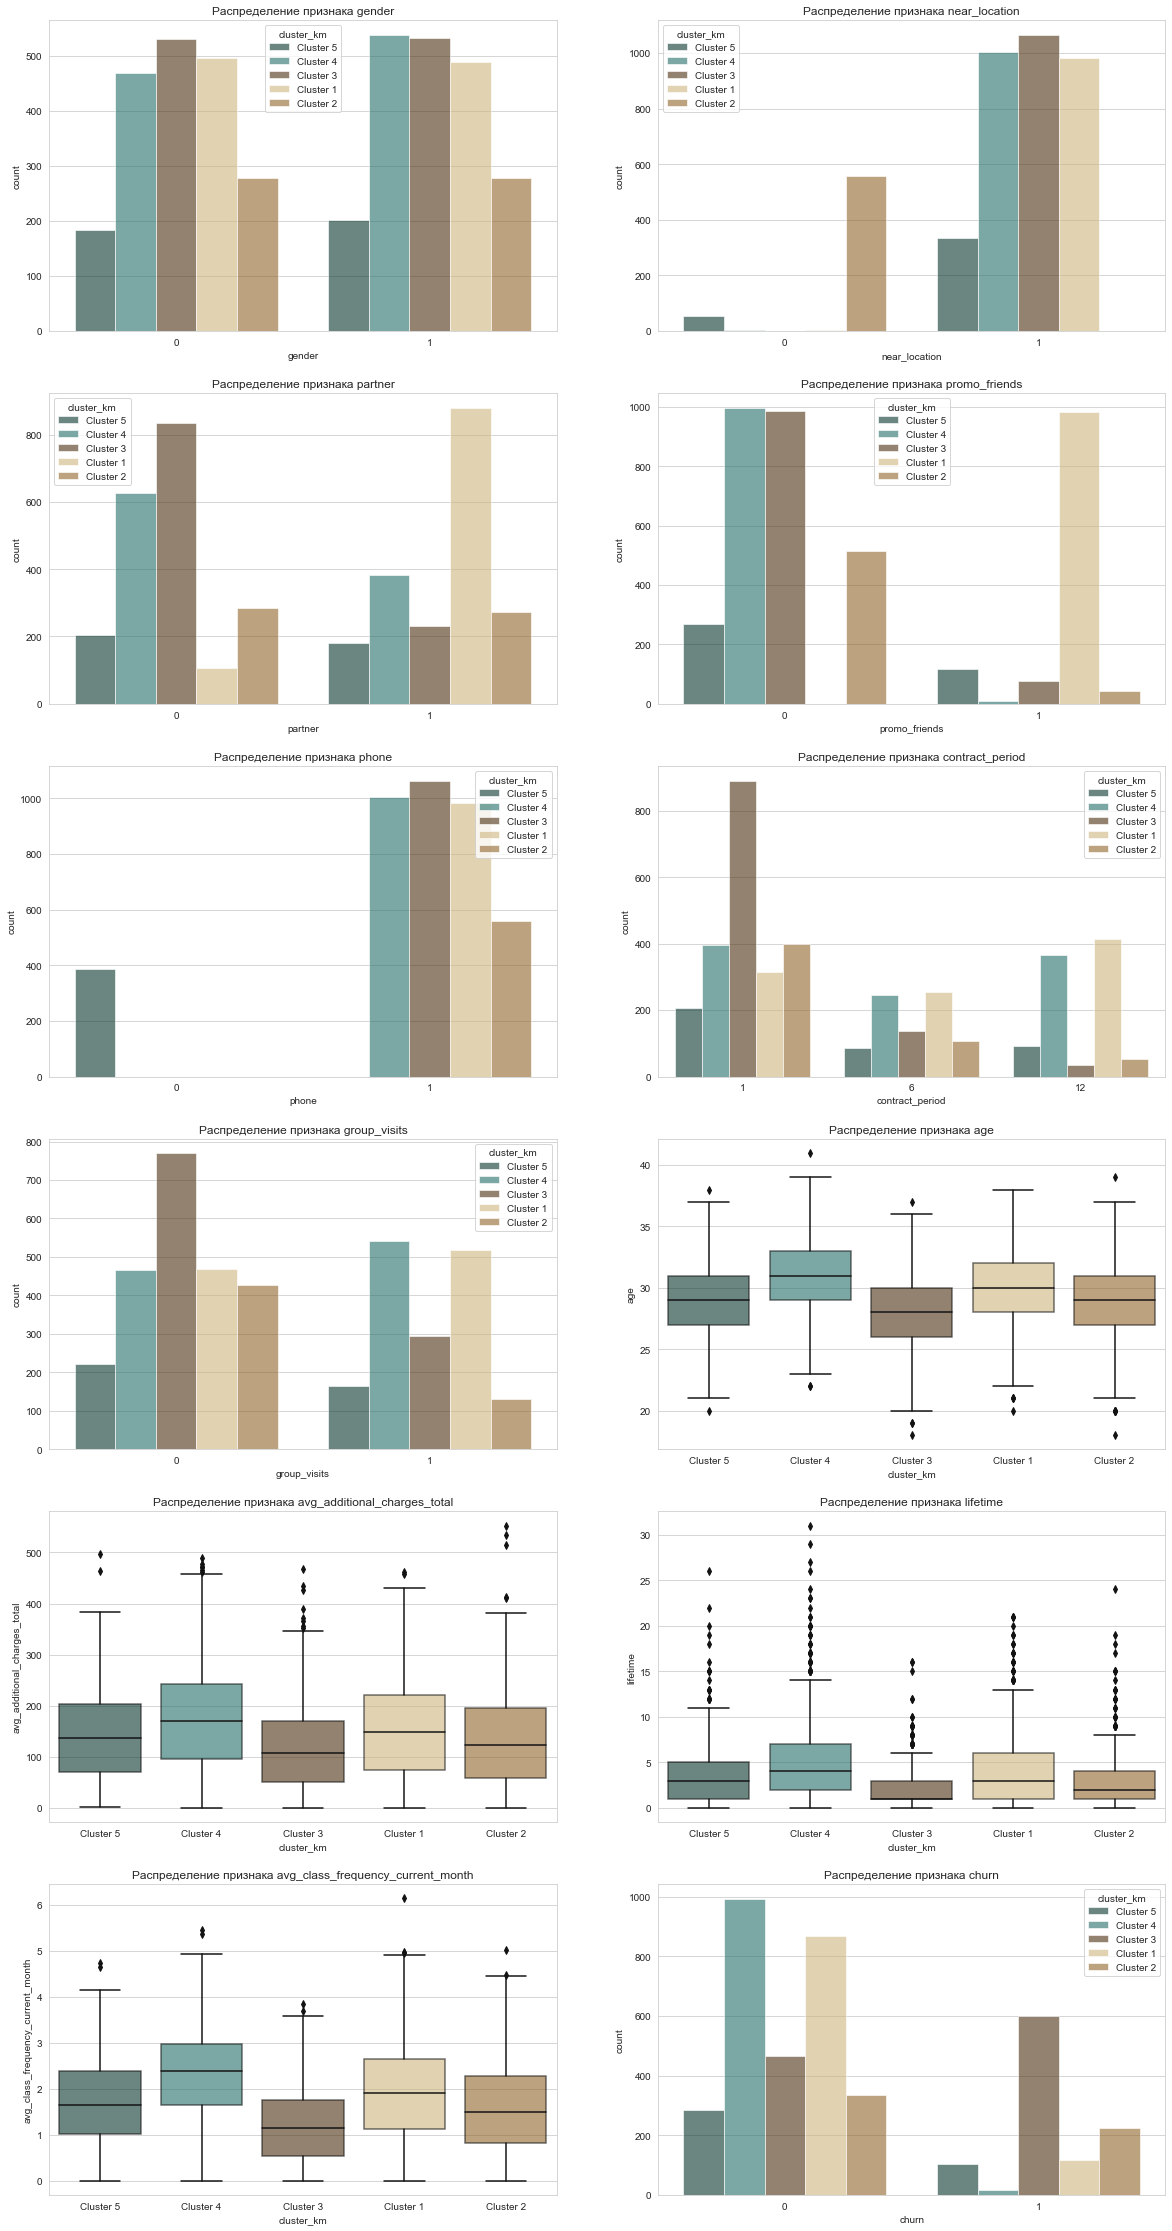

In [26]:
discr_vars = ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'churn']
contin_vars = list(set(forecast_data.columns) ^ set(discr_vars))

sns.set_style('whitegrid')
fig = plt.figure(figsize=(20,40))
c = 1
palette = ['#003c30', '#177b73', '#543005', '#dab972', '#a26619']

for feature in forecast_data.drop('cluster_km', axis=1).columns:
    plt.subplot(6, 2, c)
    plt.title("Распределение признака "+feature)
    plt.xlabel(feature)
    plt.ylabel("количество и плотность")
    if feature in contin_vars:
        sns.boxplot(x='cluster_km', y=feature, data=forecast_data, palette = palette, boxprops=dict(alpha=.6))
    else: 
        sns.countplot(data=forecast_data, x=feature, hue='cluster_km', palette = palette, alpha=.6)
    c = c + 1
    
plt.show()

**Кластер 1**
* Мужчин и женщин примерно поровну
* Средний возраст - 28-32 лет
* Работают или проживают рядом с фитнес-клубом
* Большинство работает в компаниях-партнерах
* Пришли по реферальной программе (промокоду для друзей)
* Указали телефон в анкете
* Используют почти в равной степени абонементы на 1, 6 и 12 месяцев
* Половина ходит на групповые занятия, половина - нет
* Тратят на дополнительные услуги от 90 до 210 у.е. в среднем
* Пользуются услугами фитнес-клуба от 1 до 6 месяцев
* За последний месяц посещали клуб от 1.1 до 2.7 раз в неделю
* Преимущественно действующие клиенты

**Кластер 2**
* Мужчин и женщин примерно поровну
* Средний возраст - 27-31 лет
* Не работают или проживают рядом с фитнес-клубом
* Половина работает в компаниях-партнерах, половина - нет
* Большинство пришли не по реферальной программе
* Указали телефон в анкете
* Чаще всего приобретают абонементы на 1 месяц
* Большинство не ходит на групповые занятия
* Тратят на дополнительные услуги от 80 до 200 у.е. в среднем
* Пользуются услугами фитнес-клуба от 1 до 4 месяцев
* За последний месяц посещали клуб от 0.9 до 2.3 раз в неделю
* 2/3 действующие клиенты, 1/3 - ушедшие

**Кластер 3**
* Мужчин и женщин примерно поровну
* Средний возраст - 26-30 лет
* Работают или проживают рядом с фитнес-клубом
* Большинство не работает в компаниях-партнерах
* Большинство пришли не по реферальной программе
* Указали телефон в анкете
* Чаще всего приобретают абонементы на 1 месяц
* Большинство не ходит на групповые занятия
* Тратят на дополнительные услуги от 50 до 180 у.е. в среднем
* Пользуются услугами фитнес-клуба от 1 до 3 месяцев
* За последний месяц посещали клуб от 0.6 до 1.8 раз в неделю
* 60% - ушедшие клиенты

**Кластер 4**
* Мужчин и женщин примерно поровну
* Средний возраст - 29-33 лет
* Работают или проживают рядом с фитнес-клубом
* Большинство не работает в компаниях-партнерах
* Пришли по реферальной программе (промо-коду для друзей)
* Указали телефон в анкете
* Используют почти в равной степени абонементы на 1, 6 и 12 месяцев
* Половина ходит на групповые занятия, половина - нет
* Тратят на дополнительные услуги от 100 до 240 у.е. в среднем
* Пользуются услугами фитнес-клуба от 2 до 7 месяцев
* За последний месяц посещали клуб от 1.8 до 3 раз в неделю
* Действующие клиенты

**Кластер 5**
* Мужчин и женщин примерно поровну
* Средний возраст - 27-31 лет
* Работают или проживают рядом с фитнес-клубом
* Половина работает в компаниях-партнерах, половина - нет
* Большинство пришли по промо-коду
* Не указали телефон в анкете
* Чаще всего приобретают абонементы на 1 месяц
* Половина ходит на групповые занятия, половина - нет
* Тратят на дополнительные услуги от 90 до 200 у.е. в среднем
* Пользуются услугами фитнес-клуба от 1 до 5 месяцев
* За последний месяц посещали клуб от 1 до 2.4 раз в неделю
* 2/3 действующие клиенты, 1/3 - ушедшие


Посчитаем долю оттока каждого кластера:

In [27]:
display(
    forecast_data.groupby('cluster_km')['churn'].mean().reset_index()
    .sort_values(by='cluster_km', ascending=True).reset_index(drop=True))

,cluster_km,churn
0,Cluster 1,0.119797
1,Cluster 2,0.403226
2,Cluster 3,0.563910
3,Cluster 4,0.014896
4,Cluster 5,0.266839


Наиболее склонными к оттоку оказались 2 и 3 кластеры - 40.3% и 56.4% соответственно. Наиболее надежный 4 кластер - с показателем оттока 1.5%

Таким образом, по совокупности факторов наиболее привлекательный сегмент клиентов - 4 кластер. Самыми непривлекательными оказались 3 и 2 кластеры.

## Выводы и рекомендации

### Выводы

Данное исследование было проведено на основе 4000 записей, содержащих анкетные данные и информацию о поведении клиентов фитнес-центра «Культурист-датасаентист». В исходном наборе данных не было обнаружено дубликатов, пропусков, выбросов или иных аномалий.

При изучении распределений переменных и межгрупповых отличий лояльных и ушедших клиентов были обнаружены следующие закономерности:
* Ядро аудитории клиентов сети фитнес-клубов составляют мужчины и женщины (в равном соотношении) в возрасте от 27 до 31 лет, живующие или работающие рядом с фитнес-клубами.
* Половина клиентов являются сотрудниками компаний-партнёров клуба, треть клиентов были первично привлечены по реферальной программе - промокоду от друзей.
* Отдел по работе с клиентами располагает информацией о номерах телефонов 90% всей клиентской базы.
* В среднем клиенты пользуются услугами фитнес-центра 3.72 месяца. 
* Длительность текущего абонемента и срок до его окончания составляет от 1 до 6 месяцев в среднем.
* Большинство клиентов посещает фитнес-клуб 1.2-2.5 раз в неделю.
* 41% клиентов хотя бы раз посещали групповые занятия.
* В среднем клиенты фитнес-центра тратят на дополнительные услуги 146.94 у.е.
* Из 4000 клиентов сети 27% считаются ушедшими.
* Лояльные (не ушедшие) клиенты, как правило, старше, больше тратят на дополнительные услуги, чаще посещают фитнес-клуб и ходят на групповые занятия, чаще покупают длительные абонементы (на полгода и год). 
* Среди лояльных клиентов заметно больше участников партнерских программ; привлеченных по промокоду; живущих и работающих рядом с фитнес-клубом.

**Предсказание оттока**

Поскольку практически все переменные (в большей степени - длительность взаимодействия, средняя частота посещений за последний месяц, возраст, срок текущего абонемента и срок до окончания абонемента) негативно коррелированы с переменной оттока, с их помощью можно прогнозировать отток и удержание клиентов. Для этого были обучены 2 модели бинарной классификации: логистическая регрессия и случайный лес. Проверка моделей на валидационных выборках показала, что по совокупности метрик обе модели хорошо предсказывают отток клиентов, однако модель логистической регрессии дает лучшие предсказания классификации оттока клиентов по сравнению с моделью случайного леса:

Метрики для модели логистической регрессии:
- Accuracy: 0.92
- Precision: 0.85
- Recall: 0.84
- F1: 0.84
- ROC_AUC: 0.97

Метрики для модели случайного леса:

- Accuracy: 0.91
- Precision: 0.85
- Recall: 0.77
- F1: 0.81
- ROC_AUC: 0.96

**Кластерный анализ клиентской базы**

По итогам иерархической кластеризации, а также с применением метода согнутого колена было установлено, что оптимальное число кластеров равно 5.  В результате кластеризации с примененим алгоритма K-Means было получено 5 групп: 1, 3 и 4 кластеры с долей 25-27%, при этом 2 и 5 кластеры оказались существенно меньше. Центры кластеров заметно дифференцированы по переменным участия в партнерской и реферальной программах, срока текущего абонемента, посещения групповых занятий, покупки дополнительных услуг, срока жизни клиента, частоты посещений в текущий месяц и оттоку.

Портрет типичных представителей каждого кластера:

**Кластер 1.** Сотрудники компаний-партнеров в возрасте 28-32 лет, работающие и проживающие рядом с фитнес-центром, привлеченные по промокоду. Приобретают абонементы на 1, 6 и 12 месяцев и пользуются услугами фитнес-клуба от 1 до 6 месяцев в среднем, ходят в клуб 1-3 раза в неделю, тратят на дополнительные услуги 90-210 у.е. Не склонны к оттоку.

**Кластер 2.** Клиенты в возрасте 27-31 лет. Живут и работают далеко от фитнес-клуба, стали клиентами не по рекомендации друзей. Чаще всего приобретают абонементы на 1 месяц и пользуются услугами фитнес-клуба от 1 до 4 месяцев, ходят в клуб 1-2 раза в неделю, не посещая групповые занятия. Тратят на дополнительные услуги от 80 до 200 у.е. Вероятность оттока - 40%

**Кластер 3.** Работающие или проживающие рядом с фитнес-клубом клиенты в возрасте 26-30 лет, не являющиеся участниками партнерских или реферальных программ. Покупают абонементы на 1 месяц и посещают клуб 1-3 месяцев по 1-2 раза в неделю, без групповых тренировок. Тратят на дополнительные услуги от 50 до 180 у.е. Сколнны к оттоку (60% - ушедшие клиенты)

**Кластер 4.** Работающие или проживающие рядом с фитнес-клубом клиенты в возрасте 29-33 лет, приходят по промокоду от друзей. Не являются сотрудниками компаний-партнеров. Пользуются услугами фитнес-клуба от 2 до 7 месяцев, по 2-3 раза в неделю, покупают абонементы на 1, 6 и 12 месяцев. Тратят на дополнительные услуги от 100 до 240 у.е. Самая лояльная группа.

**Кластер 5.** Работающие или проживающие рядом с фитнес-клубом клиенты в возрасте  27-31 лет, привлеченные по промокоду. Приобретают абонементы на 1 месяц и пользуются услугами фитнес-клуба 1-5 месяцев, по 1-2 раза в неделю. Тратят на дополнительные услуги от 90 до 200 у.е. Вероятность оттока - 27%.

Таким образом, по совокупности факторов наиболее привлекательный и надежный сегмент клиентов - 4 кластер с показателем оттока 1.5%. Наиболее склонными к оттоку и самыми непривлекательными оказались 3 и 2 кластеры.

Тем не менее, проверка полученной модели K-Means с 5 кластерами с помощью метрики силуэта (0.14) и визуальный анализ группировки показали, что внутригрупповые различия зачастую сильнее межгрупповых.

### Рекомендации

**Привелечение новых клиентов:**

Чтобы снизить долю потенциально нелояльных посетителей среди новых клиентов за счет более точного таргетинга каналов привлечения рекомендуется:

1) В промокадах для друзей ориентироваться на клиентов, работающих или проживающих рядом с фитнес-клубом. Не давать по реферальной программе специальных предложений на месячные абонементы, только на длительные.

2) В партнерской программе ориентироваться на компании рядом с фитнес-центром и предоставлять специальные условия только на абонементы 6 и 12 месяцев. Вместе с крупными работодателями можно разработать механики геймификации: команды или сотрудники с большей фитнес-активностью получают бесплатный тимбилдинг от работодателя и фитнес-клуба.

3) Не привлекать жителей отдаленных районов. Для привлечения местных жителей можно найти партнеров среди локальных магазинов здорового питания (например, Вкусвилл), сервисов доставки продуктов и готовой еды, настроить геотаргетинг по району в интернет-продвижении, разместить рекламу на станциях метро.

**Работа с текущей клиентской базой:**

Для улучшения взаимодействия с клиентами и их удержания рекомендуется:

1) После 3 месяца давать клиентам специальные условия и приобретение длительных абонементов.

2) Начислять клиентам баллы по программе лояльности (которые можно обменивать на дополнительные услуги) за посещение групповых занятий и посещение фитнес клуба более 2 раз в неделю. Также накопленные баллы могут влиять на размер скидки на новые полугодовые и годовые абонементы.